In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# CorInfoMax

In [3]:
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_FashionMNIST.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_FashionMNIST_V2.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_FashionMNIST_V3.pkl")
print(df_results.shape)
df_results.columns

(36, 7)
(40, 7)
(5, 7)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list', 'forward_backward_weight_angle_list'],
      dtype='object')

In [4]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,forward_backward_weight_angle_list,Trn_ACC,Tst_ACC
0,1,0,CorInfoMax,"{'lr_start': {'ff': [0.3, 0.22], 'fb': [nan, 0...","[0.8156666666666667, 0.8484333333333334, 0.853...","[0.804, 0.8334, 0.8386, 0.8427, 0.8476, 0.859,...","[[89.74687957763672], [83.28470611572266], [80...",0.916833,0.8824
1,1,10,CorInfoMax,"{'lr_start': {'ff': [0.3, 0.22], 'fb': [nan, 0...","[0.76735, 0.7889166666666667, 0.85801666666666...","[0.7587, 0.7802, 0.8442, 0.848, 0.854, 0.8537,...","[[89.4045639038086], [82.8412857055664], [78.8...",0.916250,0.8850
2,1,20,CorInfoMax,"{'lr_start': {'ff': [0.3, 0.22], 'fb': [nan, 0...","[0.7241833333333333, 0.755, 0.76765, 0.8671, 0...","[0.7146, 0.7394, 0.7548, 0.8495, 0.8497, 0.858...","[[89.55693054199219], [83.36177825927734], [80...",0.914967,0.8836
3,1,30,CorInfoMax,"{'lr_start': {'ff': [0.3, 0.22], 'fb': [nan, 0...","[0.76815, 0.8492333333333333, 0.85338333333333...","[0.7593, 0.8333, 0.8385, 0.8464, 0.8549, 0.859...","[[90.41036987304688], [83.0552749633789], [80....",0.915383,0.8819
4,1,40,CorInfoMax,"{'lr_start': {'ff': [0.3, 0.22], 'fb': [nan, 0...","[0.8267666666666666, 0.8346166666666667, 0.857...","[0.8214, 0.8231, 0.8442, 0.8517, 0.8571, 0.862...","[[90.37821197509766], [81.66227722167969], [78...",0.914300,0.8832


In [5]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.915547,0.88322,0.001008,0.001197


In [6]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

In [7]:
df_results.loc[df_results["setting_number"] == best_setting].iloc[0]['Hyperparams']

{'lr_start': {'ff': array([0.3 , 0.22]), 'fb': array([ nan, 0.07])},
 'lr_decay_multiplier': 0.95,
 'neural_dynamic_iterations_free': 30,
 'neural_dynamic_iterations_nudged': 10,
 'neural_lr_rule': 'divide_by_slow_loop_index',
 'neural_lr': 0.07,
 'epsilon': 0.15,
 'lambda': 0.99999,
 'architecture': [784, 500, 10],
 'three_phase': False}

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


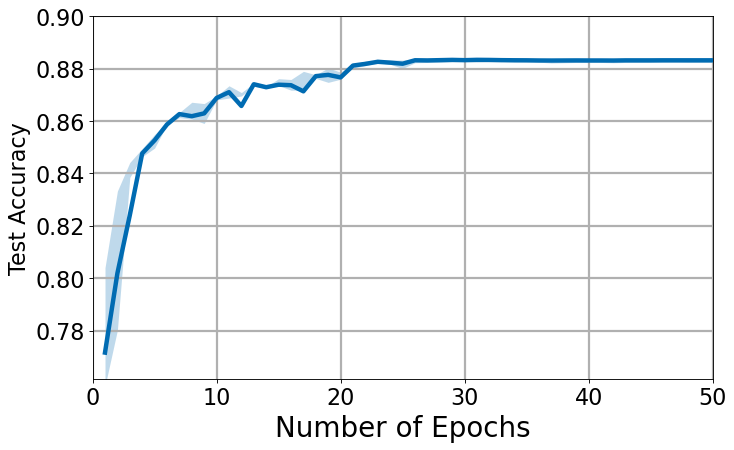

In [8]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# data = np.array(df_results.iloc[0]['Tst_ACC_list'])[np.newaxis]#.apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

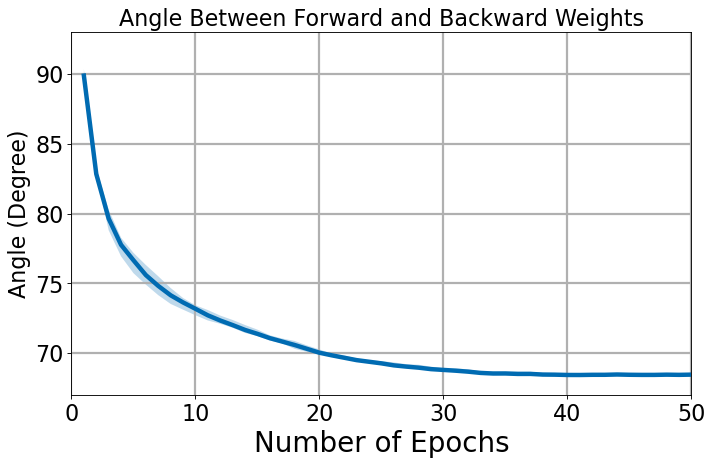

In [9]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['forward_backward_weight_angle_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# data = np.array(df_results.iloc[0]['Tst_ACC_list'])[np.newaxis]#.apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Angle (Degree)',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Angle Between Forward and Backward Weights")
plt.axis([0.0,50,67, 93])
ApplyFont(plt.gca())

# CSM

In [10]:
df_results = pd.read_pickle(r"../Results/simulation_results_CSM_FashionMNIST.pkl")
print(df_results.shape)
df_results.columns

(10, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [11]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8405166666666667, 0.8632833333333333, 0.871...","[0.8254, 0.848, 0.8559, 0.8606, 0.8637, 0.8598...",0.962350,0.8888
1,1,10,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.85055, 0.8664166666666666, 0.87006666666666...","[0.836, 0.8482, 0.852, 0.8576, 0.8517, 0.8504,...",0.960017,0.8875
2,1,20,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8478333333333333, 0.8625666666666667, 0.871...","[0.8285, 0.8464, 0.8523, 0.8482, 0.8584, 0.871...",0.962983,0.8892
3,1,30,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8459666666666666, 0.8563166666666666, 0.880...","[0.8308, 0.8417, 0.8589, 0.852, 0.8594, 0.8583...",0.962900,0.8845
4,1,40,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8430833333333333, 0.8594333333333334, 0.882...","[0.8258, 0.8425, 0.8589, 0.8449, 0.8609, 0.864...",0.960650,0.8907
5,1,50,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8151, 0.8731333333333333, 0.876766666666666...","[0.8049, 0.8584, 0.8589, 0.8518, 0.8511, 0.862...",0.960183,0.8858
6,1,60,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.84935, 0.8684166666666666, 0.856, 0.8841333...","[0.8334, 0.848, 0.8326, 0.8615, 0.8634, 0.8569...",0.961300,0.8863
7,1,70,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8494666666666667, 0.8632833333333333, 0.877...","[0.8365, 0.8432, 0.8572, 0.8619, 0.8654, 0.851...",0.957950,0.8852
8,1,80,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8582, 0.8611333333333333, 0.863283333333333...","[0.8426, 0.8414, 0.8412, 0.8619, 0.8594, 0.866...",0.964983,0.8869
9,1,90,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8428333333333333, 0.8708833333333333, 0.880...","[0.8308, 0.849, 0.8607, 0.853, 0.8594, 0.8692,...",0.963117,0.8881


In [12]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.961643,0.8873,0.00202,0.001937


In [13]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

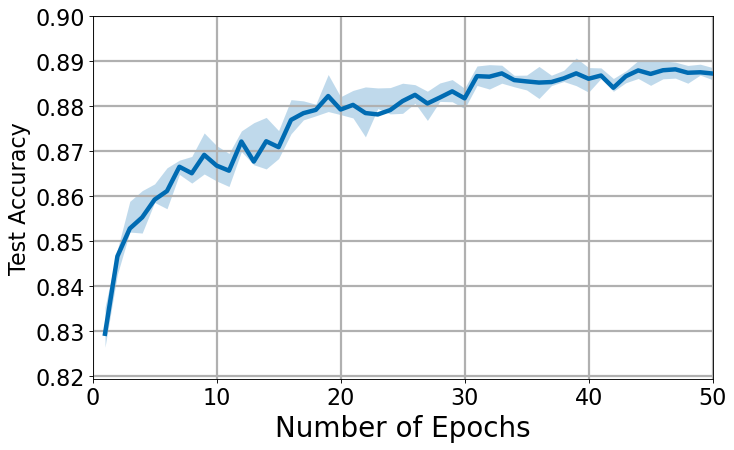

In [14]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# EP

In [15]:
df_results = pd.read_pickle(r"../Results/simulation_results_EP_FashionMNIST.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_EP_FashionMNIST_V2.pkl")
print(df_results.shape)
df_results.columns

(35, 6)
(20, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [16]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.8389833333333333, 0.8659833333333333, 0.873...","[0.8278, 0.8489, 0.8553, 0.8653, 0.8557, 0.871...",0.954300,0.8836
1,1,10,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.8519, 0.8614333333333334, 0.872166666666666...","[0.8401, 0.8441, 0.8504, 0.8638, 0.8528, 0.865...",0.949683,0.8853
2,1,20,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.8573166666666666, 0.8711166666666667, 0.878...","[0.8424, 0.8534, 0.8598, 0.8567, 0.8567, 0.867...",0.952950,0.8852
3,1,30,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.8518166666666667, 0.8581166666666666, 0.877...","[0.8368, 0.8435, 0.8574, 0.8428, 0.8616, 0.870...",0.949733,0.8810
4,1,40,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.8409166666666666, 0.8643833333333333, 0.874...","[0.8282, 0.8482, 0.8588, 0.8532, 0.8642, 0.861...",0.953617,0.8868
5,1,50,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.8537, 0.8623, 0.87605, 0.8696166666666667, ...","[0.8365, 0.8477, 0.8586, 0.8451, 0.8653, 0.861...",0.955450,0.8835
6,1,60,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.852, 0.8704166666666666, 0.8789333333333333...","[0.8419, 0.8536, 0.8574, 0.8323, 0.8606, 0.862...",0.952700,0.8819
7,1,70,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.8461166666666666, 0.8534166666666667, 0.875...","[0.8331, 0.8392, 0.8541, 0.8666, 0.8639, 0.861...",0.946783,0.8805
8,1,80,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.85685, 0.8533, 0.8801333333333333, 0.883316...","[0.8428, 0.8353, 0.8621, 0.8618, 0.8587, 0.866...",0.939583,0.8737
9,1,90,EP,"{'alphas_W': [0.07, 0.03], 'T1': 20, 'T2': 4, ...","[0.844, 0.8654833333333334, 0.8806666666666667...","[0.8276, 0.8482, 0.8616, 0.849, 0.8626, 0.8639...",0.939500,0.8745


In [17]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.949430,0.88160,0.005805,0.004419
1,2,0.951105,0.88058,0.007580,0.007038


In [18]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

2.0

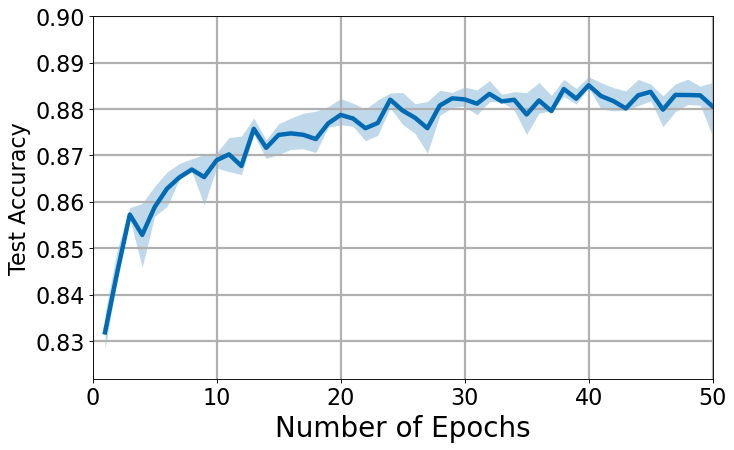

In [19]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# EP-Continual-Weight-Update

# PC

In [20]:
df_results = pd.read_pickle(r"../Results/simulation_results_PC_FashionMNIST.pkl")
print(df_results.shape)
df_results.columns

(40, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [21]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8602666666666666, 0.87755, 0.89028333333333...","[0.8465, 0.8613, 0.8719, 0.8738, 0.8736, 0.878...",0.868717,0.8326
1,1,10,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8643, 0.8769, 0.8866333333333334, 0.8957833...","[0.8496, 0.8573, 0.8634, 0.8694, 0.8726, 0.878...",0.876783,0.8451
2,1,20,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8606166666666667, 0.8673833333333333, 0.887...","[0.846, 0.8503, 0.8663, 0.8696, 0.8769, 0.8719...",0.886800,0.8525
3,1,30,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8553, 0.8804833333333333, 0.89065, 0.898, 0...","[0.8396, 0.8666, 0.8694, 0.8733, 0.8699, 0.879...",0.869617,0.8414
4,1,40,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8582, 0.8801833333333333, 0.882333333333333...","[0.8462, 0.8639, 0.8594, 0.8737, 0.8754, 0.873...",0.874450,0.8404
5,1,50,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.85225, 0.8766, 0.8901333333333333, 0.885116...","[0.8362, 0.8591, 0.8687, 0.8611, 0.8787, 0.875...",0.886200,0.8517
6,1,60,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8589833333333333, 0.8816166666666667, 0.889...","[0.8475, 0.864, 0.8693, 0.8752, 0.8768, 0.8785...",0.891800,0.8550
7,1,70,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8608, 0.8767333333333334, 0.885166666666666...","[0.844, 0.8581, 0.8648, 0.8754, 0.8688, 0.8574...",0.884967,0.8524
8,1,80,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8652166666666666, 0.8790166666666667, 0.888...","[0.8492, 0.862, 0.8647, 0.8719, 0.847, 0.8778,...",0.887483,0.8562
9,1,90,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8564833333333334, 0.87545, 0.8889, 0.894933...","[0.8436, 0.8581, 0.8653, 0.8684, 0.8661, 0.867...",0.890350,0.8551


In [22]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.881717,0.84824,0.008554,0.007932
1,2,0.914528,0.86851,0.019479,0.012529
2,3,0.929618,0.88274,0.005495,0.003579
3,4,0.948308,0.89313,0.010784,0.004174


In [23]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting# = 3

4.0

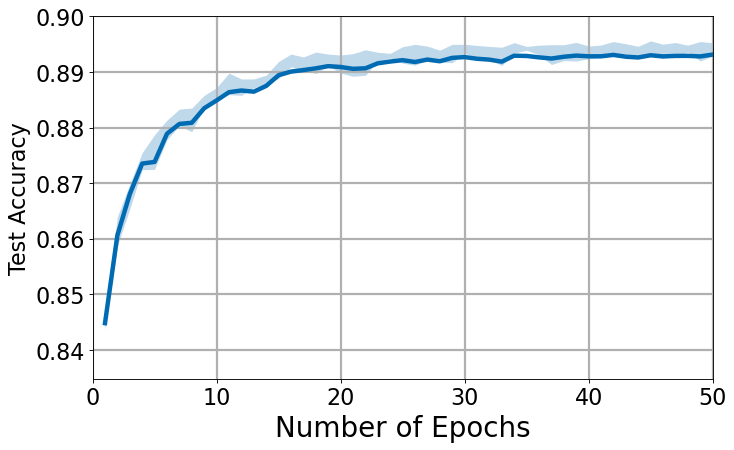

In [24]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# PC-Nudge

In [25]:
df_results = pd.read_pickle(r"../Results/simulation_results_PCNudge_FashionMNIST.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_PCNudge_FashionMNIST_V2.pkl")
print(df_results.shape)
df_results.columns

(6, 6)
(20, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [26]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8401666666666666, 0.8580666666666666, 0.859...","[0.8279, 0.8436, 0.843, 0.8538, 0.855, 0.8627,...",0.930167,0.8848
1,1,10,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8408166666666667, 0.8614333333333334, 0.867...","[0.8293, 0.8452, 0.8527, 0.8602, 0.8616, 0.862...",0.937367,0.8873
2,1,20,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8315333333333333, 0.8582, 0.867083333333333...","[0.8172, 0.8421, 0.8503, 0.8597, 0.8534, 0.866...",0.937883,0.8885
3,1,30,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8377666666666667, 0.8592833333333333, 0.867...","[0.8272, 0.8456, 0.8509, 0.8563, 0.8564, 0.865...",0.934767,0.8860
4,1,40,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.84605, 0.8636666666666667, 0.86871666666666...","[0.8331, 0.8484, 0.8523, 0.8552, 0.8583, 0.860...",0.935050,0.8866
5,1,50,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8358166666666667, 0.8557, 0.862233333333333...","[0.8232, 0.8408, 0.8447, 0.8485, 0.8604, 0.863...",0.932200,0.8811
6,1,60,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8425833333333334, 0.8567, 0.8672, 0.8754666...","[0.8306, 0.8431, 0.8498, 0.8579, 0.8604, 0.860...",0.929450,0.8826
7,1,70,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8323666666666667, 0.8576166666666667, 0.867...","[0.8173, 0.8437, 0.8527, 0.8614, 0.8643, 0.867...",0.936667,0.8852
8,1,80,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8421666666666666, 0.8570666666666666, 0.864...","[0.8279, 0.8423, 0.8488, 0.8518, 0.8541, 0.864...",0.925200,0.8828
9,1,90,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8352333333333334, 0.85385, 0.87066666666666...","[0.8223, 0.8411, 0.8552, 0.8576, 0.8609, 0.863...",0.929733,0.8844


In [27]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.932848,0.88493,0.004166,0.002293
1,2,0.932570,0.88488,0.003718,0.002842


In [28]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

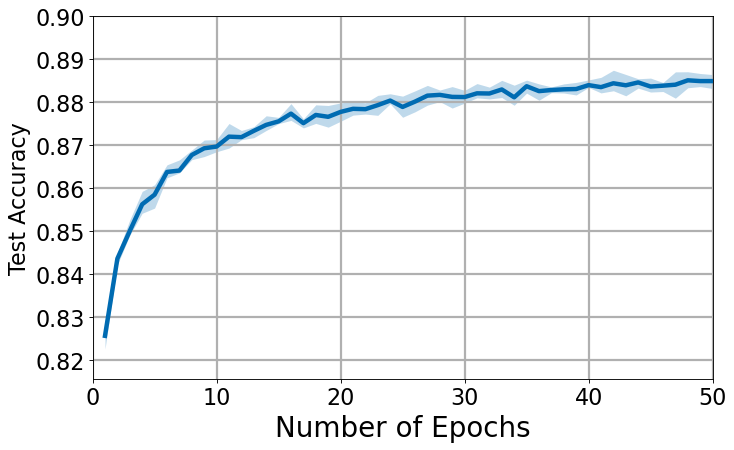

In [29]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# Altogether

### Read EP Results

In [30]:
df_results_ep = pd.read_pickle(r"../Results/simulation_results_EP_FashionMNIST_V2.pkl")
df_results_ep['Trn_ACC'] = df_results_ep.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_ep['Tst_ACC'] = df_results_ep.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_ep = df_results_ep[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_ep = df_setting_ep.iloc[df_setting_ep['Trn_ACC'].argmax()]['setting_number']

data_ep_tst = np.stack(df_results_ep.loc[df_results_ep["setting_number"] == best_setting_ep]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_ep_trn = np.stack(df_results_ep.loc[df_results_ep["setting_number"] == best_setting_ep]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_ep_tst, perc_25_ep_tst, perc_75_ep_tst, std_data_ep_tst = perc(data_ep_tst)
mean_ep_trn, perc_25_ep_trn, perc_75_ep_trn, std_data_ep_trn = perc(data_ep_trn)

### Read CSM Results

In [31]:
df_results_csm = pd.read_pickle(r"../Results/simulation_results_CSM_FashionMNIST.pkl")
df_results_csm['Trn_ACC'] = df_results_csm.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_csm['Tst_ACC'] = df_results_csm.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_csm = df_results_csm[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_csm = df_setting_csm.iloc[df_setting_csm['Trn_ACC'].argmax()]['setting_number']

data_csm_tst = np.stack(df_results_csm.loc[df_results_csm["setting_number"] == best_setting_csm]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_csm_trn = np.stack(df_results_csm.loc[df_results_csm["setting_number"] == best_setting_csm]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_csm_tst, perc_25_csm_tst, perc_75_csm_tst, std_data_csm_tst = perc(data_csm_tst)
mean_csm_trn, perc_25_csm_trn, perc_75_csm_trn, std_data_csm_trn = perc(data_csm_trn)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


### Read PC Results

In [32]:
df_results_pc = pd.read_pickle(r"../Results/simulation_results_PC_FashionMNIST.pkl")
df_results_pc['Trn_ACC'] = df_results_pc.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_pc['Tst_ACC'] = df_results_pc.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_pc = df_results_pc[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_pc = df_setting_pc.iloc[df_setting_pc['Trn_ACC'].argmax()]['setting_number']

data_pc_tst = np.stack(df_results_pc.loc[df_results_pc["setting_number"] == best_setting_pc]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_pc_trn = np.stack(df_results_pc.loc[df_results_pc["setting_number"] == best_setting_pc]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_pc_tst, perc_25_pc_tst, perc_75_pc_tst, std_data_pc_tst = perc(data_pc_tst)
mean_pc_trn, perc_25_pc_trn, perc_75_pc_trn, std_data_pc_trn = perc(data_pc_trn)

### Read PC-Nudge Results

In [33]:
df_results_pcn = pd.read_pickle(r"../Results/simulation_results_PCNudge_FashionMNIST_V2.pkl")
df_results_pcn['Trn_ACC'] = df_results_pcn.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_pcn['Tst_ACC'] = df_results_pcn.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_pcn = df_results_pcn[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_pcn = df_setting_pcn.iloc[df_setting_pcn['Trn_ACC'].argmax()]['setting_number']

data_pcn_tst = np.stack(df_results_pcn.loc[df_results_pcn["setting_number"] == best_setting_pcn]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_pcn_trn = np.stack(df_results_pcn.loc[df_results_pcn["setting_number"] == best_setting_pcn]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_pcn_tst, perc_25_pcn_tst, perc_75_pcn_tst, std_data_pcn_tst = perc(data_pcn_tst)
mean_pcn_trn, perc_25_pcn_trn, perc_75_pcn_trn, std_data_pcn_trn = perc(data_pcn_trn)

### Read CorInfoMax Results

In [34]:
df_results_corinfo = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_FashionMNIST_V3.pkl")
df_results_corinfo['Trn_ACC'] = df_results_corinfo.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo['Tst_ACC'] = df_results_corinfo.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_corinfo = df_results_corinfo[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo = df_setting_corinfo.iloc[df_setting_corinfo['Trn_ACC'].argmax()]['setting_number']
best_setting_corinfo = 1

data_corinfo_tst = np.stack(df_results_corinfo.loc[df_results_corinfo["setting_number"] == best_setting_corinfo]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_corinfo_trn = np.stack(df_results_corinfo.loc[df_results_corinfo["setting_number"] == best_setting_corinfo]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_corinfo_tst, perc_25_corinfo_tst, perc_75_corinfo_tst, std_data_corinfo_tst = perc(data_corinfo_tst)
mean_corinfo_trn, perc_25_corinfo_trn, perc_75_corinfo_trn, std_data_corinfo_trn = perc(data_corinfo_trn)

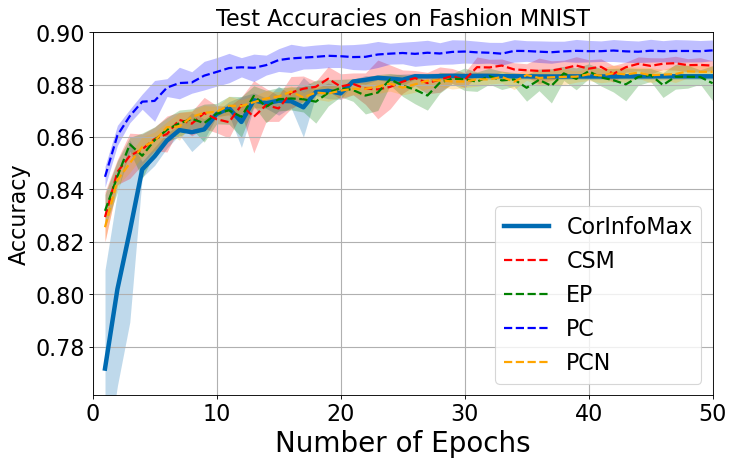

In [35]:
x = np.arange(1, mean_corinfo_tst.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)


plt.plot(x, mean_corinfo_tst, linewidth=4, color='#006BB2', label = "CorInfoMax")
plt.fill_between(x, mean_corinfo_tst - std_data_corinfo_tst, mean_corinfo_tst + std_data_corinfo_tst, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(x, mean_csm_tst, 'r--', linewidth=2, label = "CSM")
plt.fill_between(x, mean_csm_tst - std_data_csm_tst, mean_csm_tst + std_data_csm_tst, color = 'red', alpha=0.25, linewidth=0)

plt.plot(x, mean_ep_tst, 'g--', linewidth=2, label = "EP")
plt.fill_between(x, mean_ep_tst - std_data_ep_tst, mean_ep_tst + std_data_ep_tst, color = 'green', alpha=0.25, linewidth=0)

plt.plot(x, mean_pc_tst, 'b--', linewidth=2, label = "PC")
plt.fill_between(x, mean_pc_tst - std_data_pc_tst, mean_pc_tst + std_data_pc_tst, color = 'blue', alpha=0.25, linewidth=0)

plt.plot(x, mean_pcn_tst, '--', color = "orange", linewidth=2, label = "PCN")
plt.fill_between(x, mean_pcn_tst - std_data_pcn_tst, mean_pcn_tst + std_data_pcn_tst, color = 'orange', alpha=0.25, linewidth=0)


gh=plt.grid(linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Test Accuracies on Fashion MNIST",fontsize=25)
plt.legend(fontsize = 20, loc = "best")
plt.axis([0.0,50,mean_corinfo_tst[0] - 0.01,0.90])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxFashionMNISTTestAccuracyComparison.pdf', format='pdf')

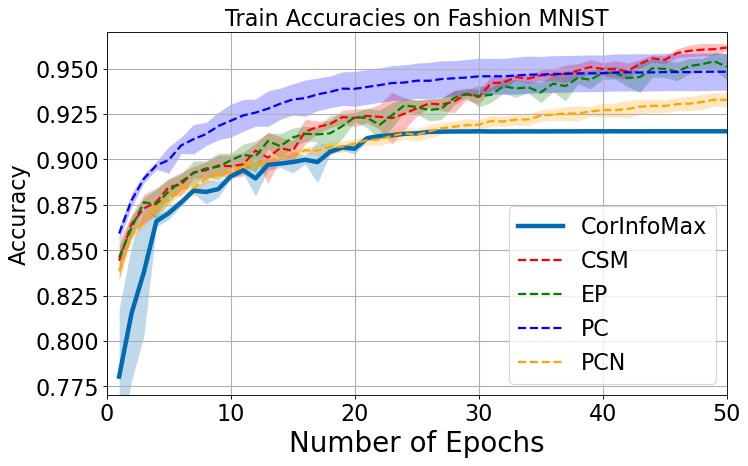

In [36]:
x = np.arange(1, mean_corinfo_trn.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)


plt.plot(x, mean_corinfo_trn, linewidth=4, color='#006BB2', label = "CorInfoMax")
plt.fill_between(x, mean_corinfo_trn - std_data_corinfo_trn, mean_corinfo_trn + std_data_corinfo_trn, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(x, mean_csm_trn, 'r--', linewidth=2, label = "CSM")
plt.fill_between(x, mean_csm_trn - std_data_csm_trn, mean_csm_trn + std_data_csm_trn, color = 'red', alpha=0.25, linewidth=0)

plt.plot(x, mean_ep_trn, 'g--', linewidth=2, label = "EP")
plt.fill_between(x, mean_ep_trn - std_data_ep_trn, mean_ep_trn + std_data_ep_trn, color = 'green', alpha=0.25, linewidth=0)

plt.plot(x, mean_pc_trn, 'b--', linewidth=2, label = "PC")
plt.fill_between(x, mean_pc_trn - std_data_pc_trn, mean_pc_trn + std_data_pc_trn, color = 'blue', alpha=0.25, linewidth=0)

plt.plot(x, mean_pcn_trn, '--', color = "orange", linewidth=2, label = "PCN")
plt.fill_between(x, mean_pcn_trn - std_data_pcn_trn, mean_pcn_trn + std_data_pcn_trn, color = 'orange', alpha=0.25, linewidth=0)


gh=plt.grid(linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Train Accuracies on Fashion MNIST",fontsize=25)
plt.legend(fontsize = 20, loc = "best")
plt.axis([0.0,50,mean_corinfo_trn[0] - 0.01,0.97])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxFashionMNISTTrainAccuracyComparison.pdf', format='pdf')